In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


data = pd.read_csv('sunspot.txt',  header=None, delim_whitespace=True)
del data[0] ## Deletes the "year" column
#data = data.rename(columns={1: 'jan', 2: 'feb', 3: 'mar', 4:'apr',
                     #5:'may', 6:'june', 7:'july', 8:'aug',
                     #9:'sept', 10:'oct', 11:'nov', 12:'dec'})
data = data.sort_index(ascending=True)
data.head()

1     2     3     4     5      6     7      8     9     10     11    12
0  58.0  62.6  70.0  55.7  85.0   83.5  94.8   66.3  75.9  75.5  158.6  85.2
1  73.3  75.9  89.2  88.3  90.0  100.0  85.4  103.0  91.2  65.7   63.3  75.4
2  70.0  43.5  45.3  56.4  60.7   50.7  66.3   59.8  23.5  23.2   28.5  44.0
3  35.0  50.0  71.0  59.3  59.7   39.6  78.4   29.3  27.1  46.6   37.6  40.0
4  44.0  32.0  45.7  38.0  36.0   31.7  22.0   39.0  28.0  25.0   20.0   6.7

In [2]:
label_index = 0
i = 1
j = 9

labels_array = np.array([])

while i < 261:
    labels_array = np.append(labels_array,data.iloc[i][j].tolist())
    label_index+=1
    j+=1
    if(j>12):
        j=1
        i+=1

labels_test = pd.DataFrame(labels_array)
labels_test.head()

0
0  91.2
1  65.7
2  63.3
3  75.4
4  70.0

In [3]:
i = 0
j = 1
i_start = 0
j_start = 1
count_r = 0
count_c = 0
data_test_set = []

while count_r < 3112:
    data_row = np.array([])
    count_c = 0
    j = j_start
    i = i_start
    
    while count_c < 20:
        count_c+=1
        data_row = np.append(data_row, data.iloc[i][j].tolist())
        j+=1
        if(j>12):
            j=1
            i+=1
            
    j_start+=1
    if j_start > 12:
        j_start = 1
        i_start+=1
    data_test_set.append(data_row)
    count_r+=1
    
data_test_df = pd.DataFrame(data_test_set)

In [4]:
columns = data_test_df.columns.tolist()
columns = columns[::-1]
data_test_df = data_test_df[columns]
data_test_df.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
data_test_df.head()

0      1      2      3      4      5      6     7     8      9      10  \
0  103.0   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  158.6   75.5   
1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  75.9  73.3   85.2  158.6   
2   65.7   91.2  103.0   85.4  100.0   90.0   88.3  89.2  75.9   73.3   85.2   
3   63.3   65.7   91.2  103.0   85.4  100.0   90.0  88.3  89.2   75.9   73.3   
4   75.4   63.3   65.7   91.2  103.0   85.4  100.0  90.0  88.3   89.2   75.9   

      11     12     13    14    15    16    17    18    19  
0   75.9   66.3   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   75.5   75.9   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2  158.6   75.5   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3   85.2  158.6   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4   73.3   85.2  158.6  75.5  75.9  66.3  94.8  83.5  85.0

In [5]:
data_test_b = np.c_[np.ones((3112,1)), data_test_df]
data_test_b

array([[  1. , 103. ,  85.4, ...,  70. ,  62.6,  58. ],
       [  1. ,  91.2, 103. , ...,  55.7,  70. ,  62.6],
       [  1. ,  65.7,  91.2, ...,  85. ,  55.7,  70. ],
       ...,
       [  1. ,   4.3,   0. , ...,   2.9,   9.3,   2.1],
       [  1. ,   4.8,   4.3, ...,   3.2,   2.9,   9.3],
       [  1. ,   4.1,   4.8, ...,   3.4,   3.2,   2.9]])

In [32]:
# Normal Equation (theta that minimze COST FUNCTION MSE):
theta_best = np.linalg.inv(data_test_b.T.dot(data_test_b)).dot(data_test_b.T).dot(labels_test.values)
theta_best

array([[ 3.40753279e+00],
       [ 5.42742346e-01],
       [ 9.36178958e-02],
       [ 1.01431739e-01],
       [ 8.66568705e-02],
       [ 3.81649881e-02],
       [ 6.33077050e-02],
       [ 8.09135445e-04],
       [ 2.78924119e-02],
       [ 9.55003770e-02],
       [ 2.07517303e-02],
       [ 2.67433309e-02],
       [ 5.34725403e-03],
       [-3.01700873e-02],
       [ 2.73501594e-02],
       [ 1.32974778e-02],
       [-4.66236520e-02],
       [-5.55622599e-04],
       [-7.26082436e-02],
       [-7.74804120e-03],
       [-5.20224438e-02]])

In [7]:
# Predicting using the trained parameter theta_best:
y_hat = data_test_b.dot(theta_best)
y_hat

array([[99.34702546],
       [93.50425577],
       [75.38995561],
       ...,
       [ 6.22301807],
       [ 6.38242218],
       [ 6.5075885 ]])

In [8]:
labels_test.values

array([[91.2],
       [65.7],
       [63.3],
       ...,
       [ 4.8],
       [ 4.1],
       [10.8]])

In [9]:
import math
error = np.sqrt(np.mean((labels_test.values - y_hat)**2))
error


15.370232088543426

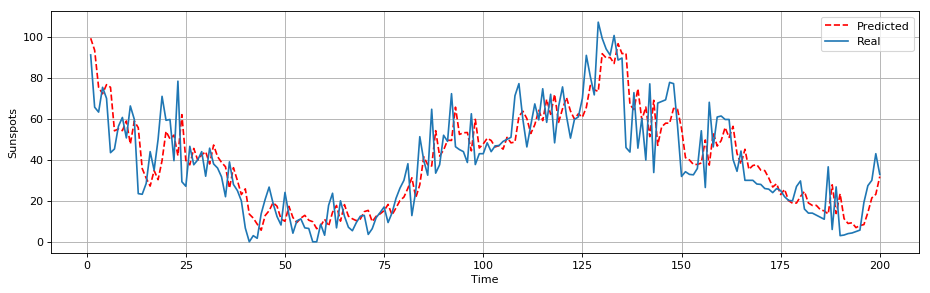

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
#data_test_df.hist(bins=50, figsize=(20,13))
x = np.linspace(1, 200,num=200)
plt.plot(x,y_hat[:200,:],'--r',label='Test')
plt.plot(x,labels_test.values[:200,:],'-')
plt.grid(True)
plt.gca().legend(('Predicted','Real'))
plt.xlabel('Time')
plt.ylabel('Sunspots')

plt.show()

In [11]:
label_index = 0
i = 1
j = 9

labels_array = np.array([])

while i < 266:
    labels_array = np.append(labels_array,data.iloc[i][j].tolist())
    label_index+=1
    j+=1
    if(j>12):
        j=1
        i+=1

labels_full = pd.DataFrame(labels_array)
print(labels_full.shape)
labels_full.tail()

(3172, 1)


0
3167  74.6
3168  87.6
3169  60.6
3170  70.2
3171  76.7

In [12]:
i = 0
j = 1
i_start = 0
j_start = 1
count_r = 0
count_c = 0
data_test_set = []

while count_r < 3172:
    data_row = np.array([])
    count_c = 0
    j = j_start
    i = i_start
    
    while count_c < 20:
        count_c+=1
        data_row = np.append(data_row, data.iloc[i][j].tolist())
        j+=1
        if(j>12):
            j=1
            i+=1
            
    j_start+=1
    if j_start > 12:
        j_start = 1
        i_start+=1
    data_test_set.append(data_row)
    count_r+=1
    
data_full_df = pd.DataFrame(data_test_set)

In [13]:
columns = data_full_df.columns.tolist()
columns = columns[::-1]
data_full_df = data_full_df[columns]
data_full_df.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
data_full_df.tail()

0     1     2     3     4      5      6      7      8      9     10  \
3167  72.4  71.0  75.2  84.7  91.9  102.3   81.8   90.3   77.6   85.6  37.0   
3168  74.6  72.4  71.0  75.2  84.7   91.9  102.3   81.8   90.3   77.6  85.6   
3169  87.6  74.6  72.4  71.0  75.2   84.7   91.9  102.3   81.8   90.3  77.6   
3170  60.6  87.6  74.6  72.4  71.0   75.2   84.7   91.9  102.3   81.8  90.3   
3171  70.2  60.6  87.6  74.6  72.4   71.0   75.2   84.7   91.9  102.3  81.8   

        11    12    13    14    15    16    17    18    19  
3167  66.0  57.0  52.5  78.7  72.4  57.9  38.0  62.9  40.8  
3168  37.0  66.0  57.0  52.5  78.7  72.4  57.9  38.0  62.9  
3169  85.6  37.0  66.0  57.0  52.5  78.7  72.4  57.9  38.0  
3170  77.6  85.6  37.0  66.0  57.0  52.5  78.7  72.4  57.9  
3171  90.3  77.6  85.6  37.0  66.0  57.0  52.5  78.7  72.4

In [14]:
data_full_df

0      1      2      3      4      5      6      7      8      9   \
0     103.0   85.4  100.0   90.0   88.3   89.2   75.9   73.3   85.2  158.6   
1      91.2  103.0   85.4  100.0   90.0   88.3   89.2   75.9   73.3   85.2   
2      65.7   91.2  103.0   85.4  100.0   90.0   88.3   89.2   75.9   73.3   
3      63.3   65.7   91.2  103.0   85.4  100.0   90.0   88.3   89.2   75.9   
4      75.4   63.3   65.7   91.2  103.0   85.4  100.0   90.0   88.3   89.2   
5      70.0   75.4   63.3   65.7   91.2  103.0   85.4  100.0   90.0   88.3   
6      43.5   70.0   75.4   63.3   65.7   91.2  103.0   85.4  100.0   90.0   
7      45.3   43.5   70.0   75.4   63.3   65.7   91.2  103.0   85.4  100.0   
8      56.4   45.3   43.5   70.0   75.4   63.3   65.7   91.2  103.0   85.4   
9      60.7   56.4   45.3   43.5   70.0   75.4   63.3   65.7   91.2  103.0   
10     50.7   60.7   56.4   45.3   43.5   70.0   75.4   63.3   65.7   91.2   
11     66.3   50.7   60.7   56.4   45.3   43.5   70.0   75.4   63.3   65.7   
12     59.8   66.3   50.7   60.7   56.4   45.3   43.5   70.0   75.4   63.3   
13     23.5   59.8   66.3   50.7   60.7   56.4   45.3   43.5   70.0   75.4   
14     23.2   23.5   59.8   66.3   50.7   60.7   56.4   45.3   43.5   70.0   
15     28.5   23.2   23.5   59.8   66.3   50.7   60.7   56.4   45.3   43.5   
16     44.0   28.5   23.2   23.5   59.8   66.3   50.7   60.7   56.4   45.3   
17     35.0   44.0   28.5   23.2   23.5   59.8   66.3   50.7   60.7   56.4   
18     50.0   35.0   44.0   28.5   23.2   23.5   59.8   66.3   50.7   60.7   
19     71.0   50.0   35.0   44.0   28.5   23.2   23.5   59.8   66.3   50.7   
20     59.3   71.0   50.0   35.0   44.0   28.5   23.2   23.5   59.8   66.3   
21     59.7   59.3   71.0   50.0   35.0   44.0   28.5   23.2   23.5   59.8   
22     39.6   59.7   59.3   71.0   50.0   35.0   44.0   28.5   23.2   23.5   
23     78.4   39.6   59.7   59.3   71.0   50.0   35.0   44.0   28.5   23.2   
24     29.3   78.4   39.6   59.7   59.3   71.0   50.0   35.0   44.0   28.5   
25     27.1   29.3   78.4   39.6   59.7   59.3   71.0   50.0   35.0   44.0   
26     46.6   27.1   29.3   78.4   39.6   59.7   59.3   71.0   50.0   35.0   
27     37.6   46.6   27.1   29.3   78.4   39.6   59.7   59.3   71.0   50.0   
28     40.0   37.6   46.6   27.1   29.3   78.4   39.6   59.7   59.3   71.0   
29     44.0   40.0   37.6   46.6   27.1   29.3   78.4   39.6   59.7   59.3   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3142   64.5   69.0   55.2   64.3   32.9   58.3   73.0   96.7   88.0   78.0   
3143   66.5   64.5   69.0   55.2   64.3   32.9   58.3   73.0   96.7   88.0   
3144   63.0   66.5   64.5   69.0   55.2   64.3   32.9   58.3   73.0   96.7   
3145   61.4   63.0   66.5   64.5   69.0   55.2   64.3   32.9   58.3   73.0   
3146   53.3   61.4   63.0   66.5   64.5   69.0   55.2   64.3   32.9   58.3   
3147   61.8   53.3   61.4   63.0   66.5   64.5   69.0   55.2   64.3   32.9   
3148   40.8   61.8   53.3   61.4   63.0   66.5   64.5   69.0   55.2   64.3   
3149   62.9   40.8   61.8   53.3   61.4   63.0   66.5   64.5   69.0   55.2   
3150   38.0   62.9   40.8   61.8   53.3   61.4   63.0   66.5   64.5   69.0   
3151   57.9   38.0   62.9   40.8   61.8   53.3   61.4   63.0   66.5   64.5   
3152   72.4   57.9   38.0   62.9   40.8   61.8   53.3   61.4   63.0   66.5   
3153   78.7   72.4   57.9   38.0   62.9   40.8   61.8   53.3   61.4   63.0   
3154   52.5   78.7   72.4   57.9   38.0   62.9   40.8   61.8   53.3   61.4   
3155   57.0   52.5   78.7   72.4   57.9   38.0   62.9   40.8   61.8   53.3   
3156   66.0   57.0   52.5   78.7   72.4   57.9   38.0   62.9   40.8   61.8   
3157   37.0   66.0   57.0   52.5   78.7   72.4   57.9   38.0   62.9   40.8   
3158   85.6   37.0   66.0   57.0   52.5   78.7   72.4   57.9   38.0   62.9   
3159   77.6   85.6   37.0   66.0   57.0   52.5   78.7   72.4   57.9   38.0   
3160   90.3   77.6   85.6   37.0   66.0   57.0   52.5   78.7   72.4   57.9   
3161   81.8   90.3   77.6   85.

In [15]:
indices = list(range(20))
indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [16]:
import random
k = 4
seed = 42
subset_size = round(len(indices) / k)
subset_size
random.Random(seed).shuffle(indices)

In [17]:
subsets = [indices[x:x+subset_size] for x in range(0,len(indices),subset_size)]
subsets

[[19, 5, 14, 4, 9], [13, 15, 18, 6, 12], [17, 10, 1, 11, 2], [16, 7, 8, 0, 3]]

In [18]:
kfolds = []
for i in range(k):
    test = subsets[i]
    train = []
    for subset in subsets:
        if subset != test:
            train.append(subset)
    kfolds.append((train, test))

In [19]:
kfolds

[([[13, 15, 18, 6, 12], [17, 10, 1, 11, 2], [16, 7, 8, 0, 3]],
  [19, 5, 14, 4, 9]),
 ([[19, 5, 14, 4, 9], [17, 10, 1, 11, 2], [16, 7, 8, 0, 3]],
  [13, 15, 18, 6, 12]),
 ([[19, 5, 14, 4, 9], [13, 15, 18, 6, 12], [16, 7, 8, 0, 3]],
  [17, 10, 1, 11, 2]),
 ([[19, 5, 14, 4, 9], [13, 15, 18, 6, 12], [17, 10, 1, 11, 2]],
  [16, 7, 8, 0, 3])]

In [20]:
kfolds[0][0]

[[13, 15, 18, 6, 12], [17, 10, 1, 11, 2], [16, 7, 8, 0, 3]]

In [21]:
df = pd.DataFrame()

for lists in kfolds[0][0]:
    
    df.append(data_full_df.iloc[lists])
    
df

Empty DataFrame
Columns: []
Index: []

In [22]:
linha = np.array([])

# conjuntos de teste
for lists in kfolds[0][0]:
    linha = np.append(linha, data_full_df.iloc[lists])
    
    
linha

array([ 23.5,  59.8,  66.3,  50.7,  60.7,  56.4,  45.3,  43.5,  70. ,
        75.4,  63.3,  65.7,  91.2, 103. ,  85.4, 100. ,  90. ,  88.3,
        89.2,  75.9,  28.5,  23.2,  23.5,  59.8,  66.3,  50.7,  60.7,
        56.4,  45.3,  43.5,  70. ,  75.4,  63.3,  65.7,  91.2, 103. ,
        85.4, 100. ,  90. ,  88.3,  50. ,  35. ,  44. ,  28.5,  23.2,
        23.5,  59.8,  66.3,  50.7,  60.7,  56.4,  45.3,  43.5,  70. ,
        75.4,  63.3,  65.7,  91.2, 103. ,  85.4,  43.5,  70. ,  75.4,
        63.3,  65.7,  91.2, 103. ,  85.4, 100. ,  90. ,  88.3,  89.2,
        75.9,  73.3,  85.2, 158.6,  75.5,  75.9,  66.3,  94.8,  59.8,
        66.3,  50.7,  60.7,  56.4,  45.3,  43.5,  70. ,  75.4,  63.3,
        65.7,  91.2, 103. ,  85.4, 100. ,  90. ,  88.3,  89.2,  75.9,
        73.3,  35. ,  44. ,  28.5,  23.2,  23.5,  59.8,  66.3,  50.7,
        60.7,  56.4,  45.3,  43.5,  70. ,  75.4,  63.3,  65.7,  91.2,
       103. ,  85.4, 100. ,  50.7,  60.7,  56.4,  45.3,  43.5,  70. ,
        75.4,  63.3,

In [23]:
k = 0

teste_set2 = []
teste_set =[]
# conjuntos de teste
for lists in kfolds[0][0]:
    print(lists)

[13, 15, 18, 6, 12]
[17, 10, 1, 11, 2]
[16, 7, 8, 0, 3]


In [24]:
test

[16, 7, 8, 0, 3]

In [25]:
labels_full.head()

0
0  91.2
1  65.7
2  63.3
3  75.4
4  70.0

In [26]:
data_full_df.head()

0      1      2      3      4      5      6     7     8      9      10  \
0  103.0   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  158.6   75.5   
1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  75.9  73.3   85.2  158.6   
2   65.7   91.2  103.0   85.4  100.0   90.0   88.3  89.2  75.9   73.3   85.2   
3   63.3   65.7   91.2  103.0   85.4  100.0   90.0  88.3  89.2   75.9   73.3   
4   75.4   63.3   65.7   91.2  103.0   85.4  100.0  90.0  88.3   89.2   75.9   

      11     12     13    14    15    16    17    18    19  
0   75.9   66.3   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   75.5   75.9   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2  158.6   75.5   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3   85.2  158.6   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4   73.3   85.2  158.6  75.5  75.9  66.3  94.8  83.5  85.0

In [27]:
data_full_df.shape

(3172, 20)

In [198]:
#errors = []
min_rmse_indexes = []
min_rmse_values = []
N = 20 #numero de variaveis
data_wrapper = data_full_df.copy()
data_wrapper.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


while (N > 10):
    errors = []
    for column in data_wrapper:
        best_data_wrapper = data_wrapper.copy()
        labels_wrapper = labels_full.copy()
        best_data_wrapper = best_data_wrapper.drop(column, axis=1)
        best_data_wrapper_b = np.c_[np.ones((3172,1)), best_data_wrapper] # Adiciona a coluna de 1s
        # Equação Normal
        theta_best = np.linalg.inv(best_data_wrapper_b.T.dot(best_data_wrapper_b)).dot(best_data_wrapper_b.T).dot(labels_wrapper.values)
        y_hat_wrapper = best_data_wrapper_b.dot(theta_best)
        print('RMSE sem a variável', column)
        error_wrapper = np.sqrt(np.mean((labels_wrapper.values - y_hat_wrapper)**2))
        print(error_wrapper)
        errors.append(error_wrapper)  
           
    print('\n', '#'*5, 'VARIÁVEL RETIRADA:', errors.index(min(errors))+1, '#'*5, '\n')
    data_wrapper = data_wrapper.drop(errors.index(min(errors))+1, axis=1)
    #data_wrapper.columns = np.arange(len(data_wrapper.columns))
    # pegando o índice que represeta o menor RMSE:
    min_rmse_indexes.append(errors.index(min(errors))+1)
    print('\n', '#'*5, 'VARIÁVEIS RETIRADAS:', min_rmse_indexes, '#'*5, '\n')
    # Append do menor valor RMSE:
    min_rmse_values.append(min(errors))
    
    
    N-=1
    
print(min_rmse_indexes)
print(min_rmse_values)
    

RMSE sem a variável 1
17.48198022711698
RMSE sem a variável 2
15.40395843418383
RMSE sem a variável 3
15.403270111216887
RMSE sem a variável 4
15.39355122502191
RMSE sem a variável 5
15.356814280120016
RMSE sem a variável 6
15.37573170071889
RMSE sem a variável 7
15.34920326164736
RMSE sem a variável 8
15.35320185842025
RMSE sem a variável 9
15.402108732735355
RMSE sem a variável 10
15.350967984287657
RMSE sem a variável 11
15.353091587413033
RMSE sem a variável 12
15.34928019113051
RMSE sem a variável 13
15.35382090999649
RMSE sem a variável 14
15.353550972252197
RMSE sem a variável 15
15.349850304941617
RMSE sem a variável 16
15.361322791274135
RMSE sem a variável 17
15.349161535958004
RMSE sem a variável 18
15.380321301826694
RMSE sem a variável 19
15.349323117426255
RMSE sem a variável 20
15.37034019540221

 ##### VARIÁVEL RETIRADA: 17 ##### 


 ##### VARIÁVEIS RETIRADAS: [17] ##### 

RMSE sem a variável 1
17.486100184667322
RMSE sem a variável 2
15.403982689857337
RMSE sem a variá

KeyError: '[10] not found in axis'

In [177]:
errors

[17.48198022711698,
 15.40395843418383,
 15.403270111216887,
 15.39355122502191,
 15.356814280120016,
 15.37573170071889,
 15.34920326164736,
 15.35320185842025,
 15.402108732735355,
 15.350967984287657,
 15.353091587413033,
 15.34928019113051,
 15.35382090999649,
 15.353550972252197,
 15.349850304941617,
 15.361322791274135,
 15.349161535958004,
 15.380321301826694,
 15.349323117426255,
 15.37034019540221]

In [171]:
best_data_wrapper_b

array([[  1. , 103. ,  85.4, ...,  55.7,  70. ,  62.6],
       [  1. ,  91.2, 103. , ...,  85. ,  55.7,  70. ],
       [  1. ,  65.7,  91.2, ...,  83.5,  85. ,  55.7],
       ...,
       [  1. ,  87.6,  74.6, ...,  78.7,  72.4,  57.9],
       [  1. ,  60.6,  87.6, ...,  52.5,  78.7,  72.4],
       [  1. ,  70.2,  60.6, ...,  57. ,  52.5,  78.7]])

In [126]:
data_wrapper.head()

0      1      2      3      4      5      6     7     8      9      10  \
0  103.0   85.4  100.0   90.0   88.3   89.2   75.9  73.3  85.2  158.6   75.5   
1   91.2  103.0   85.4  100.0   90.0   88.3   89.2  75.9  73.3   85.2  158.6   
2   65.7   91.2  103.0   85.4  100.0   90.0   88.3  89.2  75.9   73.3   85.2   
3   63.3   65.7   91.2  103.0   85.4  100.0   90.0  88.3  89.2   75.9   73.3   
4   75.4   63.3   65.7   91.2  103.0   85.4  100.0  90.0  88.3   89.2   75.9   

      11     12     13    14    15    16    17    18    19  
0   75.9   66.3   94.8  83.5  85.0  55.7  70.0  62.6  58.0  
1   75.5   75.9   66.3  94.8  83.5  85.0  55.7  70.0  62.6  
2  158.6   75.5   75.9  66.3  94.8  83.5  85.0  55.7  70.0  
3   85.2  158.6   75.5  75.9  66.3  94.8  83.5  85.0  55.7  
4   73.3   85.2  158.6  75.5  75.9  66.3  94.8  83.5  85.0